# I] Import + user-defined variables

In [1]:
import pandas, numpy, math, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [2]:
from matplotlib_venn import venn2

## functions & options


In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [4]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] Dataframe download and settings

In [5]:
%%time
# DL data GABARAP isoform expression
path = output_file_directory + "/GABARAP/dataframes_for_input/df_GABARAP_NormPrim.csv"
df_GABARAP_NormPrim= pandas.read_csv(path, sep = ",")

print(df_GABARAP_NormPrim.shape)
df_GABARAP_NormPrim.head(2)

(16614, 22)
Wall time: 82.8 ms


,sample,Sample_Type,Primary_Site,GABARAP,GABARAP_1,GABARAP_2,GABARAP_3,GABARAP_total,GABARAP_1tpm,GABARAP_2tpm,...,log2_p1_GABARAP_1,log2_p1_GABARAP_2,log2_p1_GABARAP_3,GABARAP_prot_tot,GABARAP_1perc,GABARAP_2perc,GABARAP_3perc,GABARAP_1norm,GABARAP_2norm,GABARAP_3norm
0,GTEX-OIZI-0005-SM-2XCED,Normal Tissue,Blood,11.27,7.823,9.316,10.4,2469.493431,226.441351,637.374609,...,7.829351,9.318259,10.401066,2214.991061,10.223127,28.775493,61.001379,0.091695,0.258099,0.547147
1,GTEX-XAJ8-0006-SM-46MVM,Normal Tissue,Blood,11.24,6.587,9.797,10.4,2418.671971,96.134675,889.590998,...,6.601914,9.798619,10.401066,2336.900774,4.113768,38.067128,57.819105,0.039747,0.367801,0.558643


In [6]:
#split to have Normal (GTEX) and Primary (TCGA)
df_GABARAP_Normal = df_GABARAP_NormPrim[df_GABARAP_NormPrim['sample'].str.startswith('GTEX')]
print(len(df_GABARAP_Normal))
df_GABARAP_Primary = df_GABARAP_NormPrim[df_GABARAP_NormPrim['sample'].str.startswith('TCGA')]
print(len(df_GABARAP_Primary))

7429
9185


# III] GABARAP expression

In [7]:
# df with only Normal and percentage
df_sampletype= df_GABARAP_Normal[['Primary_Site',
                               'GABARAP_total',             
                               'GABARAP_1perc',
                               'GABARAP_2perc',
                               'GABARAP_3perc']]

df_sampletype = df_sampletype.assign(GABARAP_3perc = df_sampletype['GABARAP_3perc'].abs(),
                                     GABARAP_2perc = df_sampletype['GABARAP_2perc'].abs())

#Column rename
df_sampletype = df_sampletype.rename(columns = {'Primary_Site' : 'Primary Site', 
                                        'GABARAP_total': 'tpm GABARAP',
                                        'GABARAP_1perc' : "% GABARAP(1)",
                                        'GABARAP_2perc' : "% GABARAP(2)",
                                        'GABARAP_3perc' : "% GABARAP(3)"})

#Groupby to have merge of all the primary site 
df_sampletype= df_sampletype.groupby('Primary Site').agg(numpy.mean)

df_sampletype.head()

,tpm GABARAP,% GABARAP(1),% GABARAP(2),% GABARAP(3)
Primary Site,,,,
Adipose Tissue,611.745290,4.265457,33.489448,62.245095
Adrenal Gland,710.459729,3.215042,28.714365,68.070594
Bladder,601.868012,3.911816,35.536096,60.552088
Blood,818.760672,4.378653,36.720844,58.900503
Blood Vessel,775.732892,4.449757,34.702829,60.847414


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


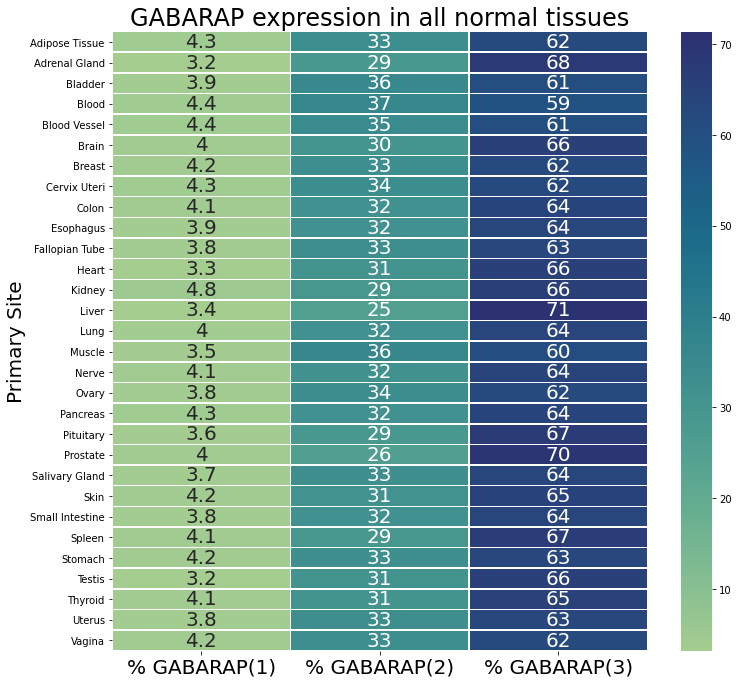

In [8]:
HeatMap_df_sampletype = df_sampletype[['% GABARAP(1)', '% GABARAP(2)', '% GABARAP(3)']]
heatmap = seaborn.heatmap(HeatMap_df_sampletype, annot=True, cmap="crest", linewidths=.5)
plt.title('GABARAP expression in all normal tissues')
plt.subplots_adjust(top=1.2)

path = 'GABARAP/figs_GABARAP_characterisation/'
plt.savefig(output_file_directory+path+'heatmap_organs.svg')

In [9]:
# df with only Normal 
hist_df_sampletype = df_sampletype.reset_index()
hist_df_sampletype = hist_df_sampletype[['Primary Site','tpm GABARAP']]
hist_df_sampletype.head()

,Primary Site,tpm GABARAP
0,Adipose Tissue,611.745290
1,Adrenal Gland,710.459729
2,Bladder,601.868012
3,Blood,818.760672
4,Blood Vessel,775.732892


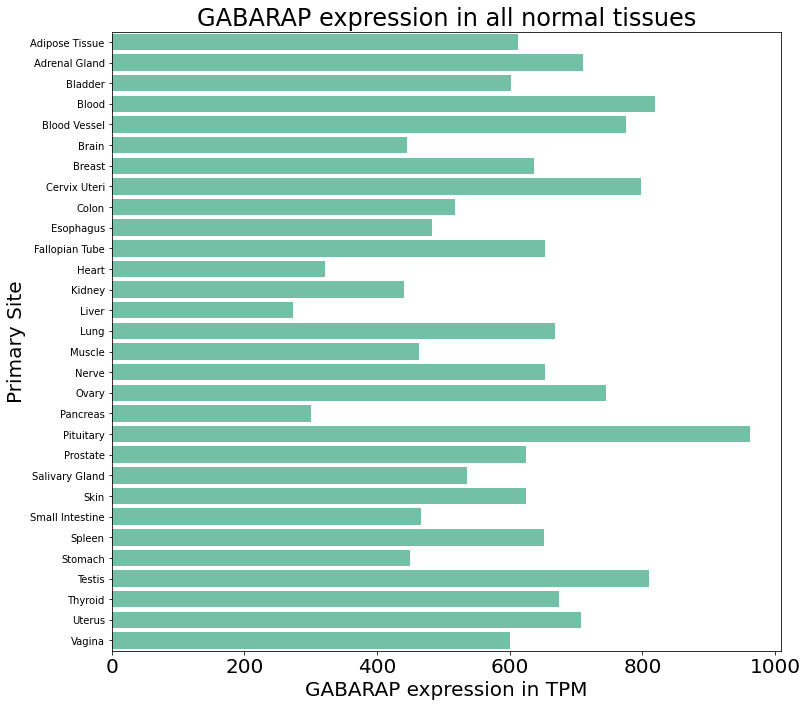

In [10]:
# Seaborn
seaborn.barplot(data = hist_df_sampletype, x =  'tpm GABARAP', y = 'Primary Site', color = 'mediumaquamarine')
plt.title('GABARAP expression in all normal tissues')
plt.xlabel('GABARAP expression in TPM')
plt.subplots_adjust(top=1.2)

path = 'GABARAP/figs_GABARAP_characterisation/'
plt.savefig(output_file_directory+path+'barplot_tpm.svg')

## A) Distribution

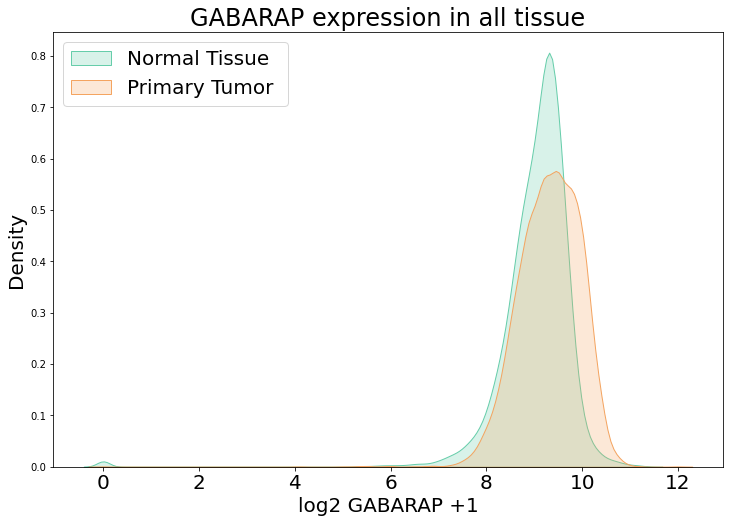

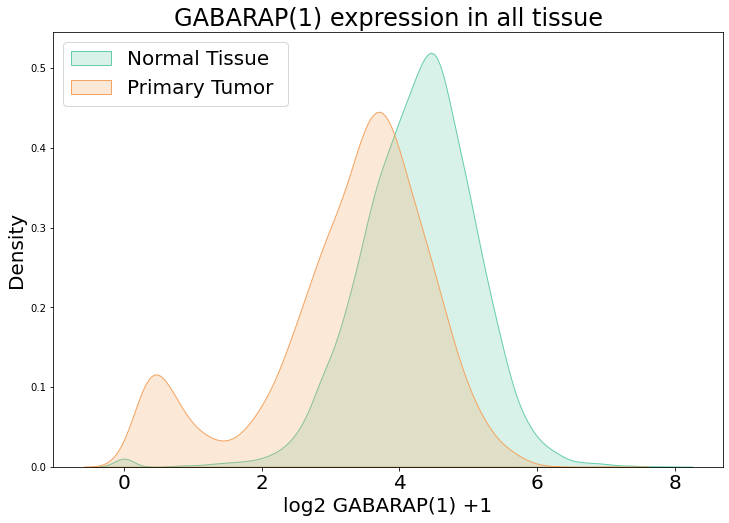

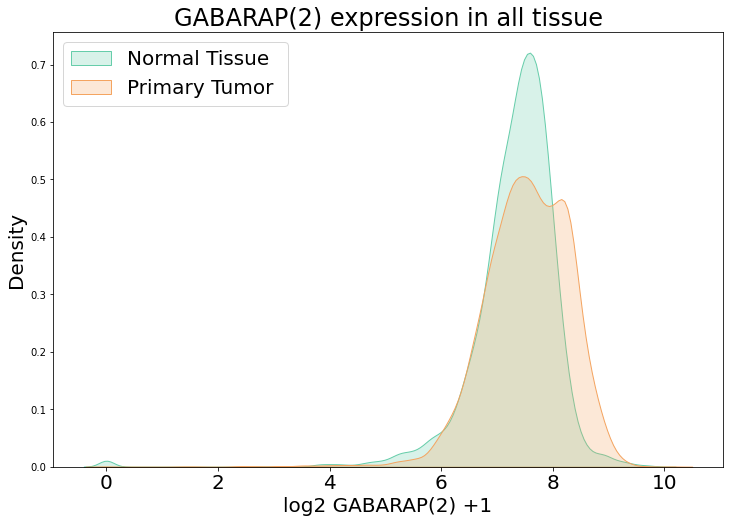

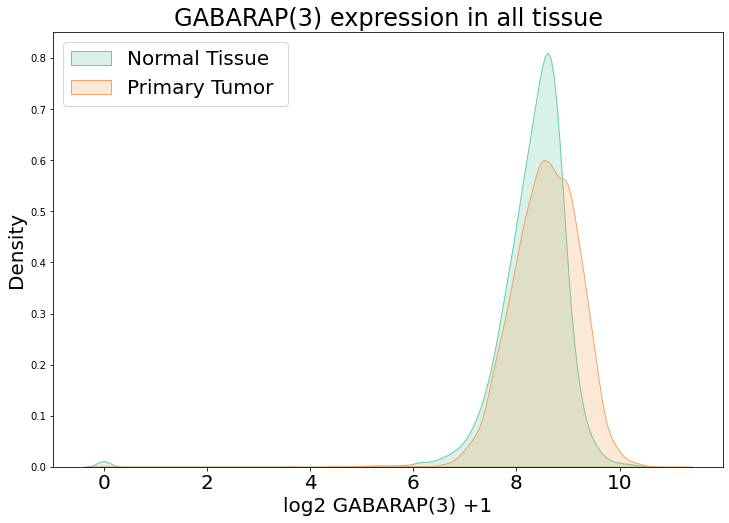

<Figure size 864x576 with 0 Axes>

In [11]:
# Distribution graph, for GABARAP, iso1 & iso2

all_dfs = [[df_GABARAP_Normal, 'in all tissue', df_GABARAP_Primary, 'all primary tumors']]

isoforms = [['log2_p1_GABARAP_total', 'GABARAP'], 
            ['log2_p1_GABARAP_1', 'GABARAP(1)'], 
            ['log2_p1_GABARAP_2', 'GABARAP(2)'],
            ['log2_p1_GABARAP_3', 'GABARAP(3)']]


for df in all_dfs:
  for isoform in isoforms:
    xData = df[0][isoform[0]]
    x2Data = df[2][isoform[0]]

    seaborn.kdeplot(xData, color = 'mediumaquamarine', fill = True)
    seaborn.kdeplot(x2Data, color = 'sandybrown', fill = True)

    plt.xlabel('log2 '+ isoform[1]+ ' +1')
    plt.title(isoform[1]+ ' expression ' + df[1] )
    plt.legend(labels=["Normal Tissue","Primary Tumor "], loc='upper left')
    plt.show()
    plt.clf()

## B) Percentage do not express GABARAP isoforms

In [12]:
#Percentage of patients: 
all_dfs = [[df_GABARAP_Normal, 'all normal tissue'], [df_GABARAP_Primary, 'all primary tumor']]

isoforms = [['GABARAP_total', 'GABARAP'], ['GABARAP_1tpm', 'GABARAP(1)'], ['GABARAP_2tpm', 'GABARAP(2)'], ['GABARAP_3tpm', 'GABARAP(3)']]

for df in all_dfs:
  print(df[1])
  for isoform in isoforms:
        
    what = isoform[1]
    all = (df[0][isoform[0]]).shape
    no_exp = (df[0][isoform[0]]<0.1).sum()
    perc_no_exp = (no_exp*100)/all
    perc_no_exp = float(perc_no_exp)

    # print("The percentage of patient who do not express", QUOI, OU, "is:", round(perc_no_exp,1),'%')
    print(round(perc_no_exp,1),'% of tumor do not express', what)
  print()


all normal tissue
0.4 % of tumor do not express GABARAP
0.4 % of tumor do not express GABARAP(1)
0.4 % of tumor do not express GABARAP(2)
0.4 % of tumor do not express GABARAP(3)

all primary tumor
0.0 % of tumor do not express GABARAP
0.5 % of tumor do not express GABARAP(1)
0.0 % of tumor do not express GABARAP(2)
0.0 % of tumor do not express GABARAP(3)



## C) Expression figures

### 1) Value TPM

16614


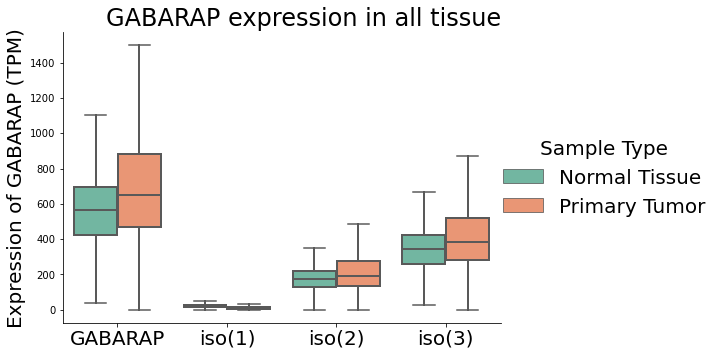

In [13]:
# Distribution: Data preparation + graph
Data = df_GABARAP_NormPrim
info = 'all tissue'

shape = Data.shape
shape = shape[0]
print(shape)

#select the sample type column
sample_type = {'sample_type':[Data.iloc[:,1][i]
  for i in range(0, shape)]}

#convert to df, and copy it 3 times
sample_typedf = pandas.DataFrame(sample_type)
sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf,sample_typedf])
sample_typedf.reset_index(drop=True, inplace=True)

# Y for expression value 
y = {'y':[Data.iloc[:,j][i]
  for j in range(7,11)
    for i in range(0, shape)]}

#create df with Y 
data_distrib = pandas.DataFrame(y)

# X for GABARAP/iso1/iso2/iso3                            
data_distrib.loc[:shape,'x'] = 'GABARAP'
data_distrib.loc[shape: shape*2,'x'] = 'iso(1)'
data_distrib.loc[shape*2:shape*3,'x'] = 'iso(2)'
data_distrib.loc[shape*3:,'x'] = 'iso(3)'

# Will be used for Hue
data_distrib['Sample Type'] = sample_typedf['sample_type']

#graph
seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.45, kind="box", palette = 'Set2', data = data_distrib, 
              boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

plt.ylabel('Expression of GABARAP (TPM)')
plt.xlabel('')
plt.title('GABARAP expression in '+ info, x=.55)

#save
path = 'GABARAP/figs_GABARAP_characterisation/'
plt.savefig(output_file_directory+path+'GABARAP_exp_alltissue.svg')

In [14]:
#Distribution: Stats for all 

all_dfs = [[df_GABARAP_Normal, 'all normal tissue', df_GABARAP_Primary, 'all primary tumors']]

isoforms = ['GABARAP_total', 'GABARAP_1tpm', 'GABARAP_2tpm', 'GABARAP_3tpm']

for df in all_dfs:
  for isoform in isoforms:

    n1 = "{:.3f}".format(numpy.median(df[0][isoform]))
    n2 = "{:.3f}".format(numpy.median(df[2][isoform]))

    # Mann-Whitney analysis 
    statistic, pvalue = scipy.stats.mannwhitneyu(df[0][isoform], df[2][isoform])
    Pvalue = "{:.3E}".format(pvalue)
    print("the pvalue between", df[1]+'('+n1+')', "and", df[3]+'('+n2+')', "for", isoform, 'is', Pvalue)
  print()


the pvalue between all normal tissue(567.312) and all primary tumors(651.218) for GABARAP_total is 8.568E-145
the pvalue between all normal tissue(18.843) and all primary tumors(10.453) for GABARAP_1tpm is 0.000E+00
the pvalue between all normal tissue(172.087) and all primary tumors(189.098) for GABARAP_2tpm is 1.065E-70
the pvalue between all normal tissue(343.221) and all primary tumors(383.477) for GABARAP_3tpm is 9.297E-107



In [15]:
#median brut file to compare 
print(df_GABARAP_NormPrim['GABARAP_total'].mean())
print(df_GABARAP_NormPrim['GABARAP_1tpm'].mean())
print(df_GABARAP_NormPrim['GABARAP_2tpm'].mean())
print(df_GABARAP_NormPrim['GABARAP_3tpm'].mean())

640.7273617774167
16.118859738982103
194.86537564117177
384.18417939963996


In [16]:
#median after modification to be sure I selected the good ones
data_distribtest = data_distrib[data_distrib['x'] == 'GABARAP']
data_distribtest1 = data_distrib[data_distrib['x'] == 'iso(1)']
data_distribtest2 = data_distrib[data_distrib['x'] == 'iso(2)']
data_distribtest3 = data_distrib[data_distrib['x'] == 'iso(3)']

print(data_distribtest.mean())
print(data_distribtest1.mean())
print(data_distribtest2.mean())
print(data_distribtest3.mean())

y    640.727362
dtype: float64
y    16.11886
dtype: float64
y    194.865376
dtype: float64
y    384.184179
dtype: float64


### 2) Normalized

16614


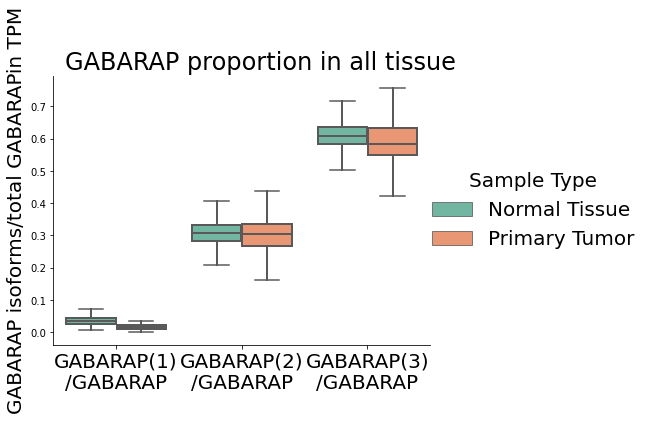

In [17]:
# NORMALiZED Distribution: Data preparation + graph
# Distribution: Data preparation + graph
Data = df_GABARAP_NormPrim
info = 'all tissue'

shape = Data.shape
shape = shape[0]
print(shape)

#select the sample type column
sample_type = {'sample_type':[Data.iloc[:,1][i]
  for i in range(0, shape)]}

#convert to df, and copy it 3 times
sample_typedf = pandas.DataFrame(sample_type)
sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf,sample_typedf])
sample_typedf.reset_index(drop=True, inplace=True)

# Y for expression value 
y = {'y':[Data.iloc[:,j][i]
  for j in range(19,22)
    for i in range(0, shape)]}

#create df with Y 
data_distrib = pandas.DataFrame(y)

# X for GABARAP/iso1/iso2                              
data_distrib.loc[:shape,'x'] = 'GABARAP(1)\n/GABARAP'
data_distrib.loc[shape: shape*2,'x'] = 'GABARAP(2)\n/GABARAP'
data_distrib.loc[shape*2:,'x'] = 'GABARAP(3)\n/GABARAP'

# Will be used for Hue
data_distrib['Sample Type'] = sample_typedf['sample_type']

#graph
seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.25, kind="box", palette = 'Set2', data = data_distrib, 
              boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

plt.ylabel('GABARAP isoforms/total GABARAPin TPM')
plt.xlabel('')
plt.title('GABARAP proportion in '+ info, x=0.55)

#save graph
path = 'GABARAP/figs_GABARAP_characterisation/'
plt.savefig(output_file_directory+path+'prop_alltissue.svg')

In [18]:
#NORMALIZED Distribution: Stats for all 

all_dfs = [[df_GABARAP_Normal, 'all normal tissue', df_GABARAP_Primary, 'all primary tumors']]

isoforms = ['GABARAP_1norm', 'GABARAP_2norm', 'GABARAP_3norm']
print('NORMALIZED')

for df in all_dfs:
  for isoform in isoforms:

    n1 = "{:.3f}".format(numpy.median(df[0][isoform]))
    n2 = "{:.3f}".format(numpy.median(df[2][isoform]))

    # Mann-Whitney analysis 
    statistic, pvalue = scipy.stats.mannwhitneyu(df[0][isoform], df[2][isoform])
    Pvalue = "{:.3E}".format(pvalue)
    print("the pvalue between", df[1]+'('+n1+')', "and", df[3]+'('+n2+')', "for", isoform, 'is', Pvalue)
  print()


NORMALIZED
the pvalue between all normal tissue(0.034) and all primary tumors(0.016) for GABARAP_1norm is 0.000E+00
the pvalue between all normal tissue(0.309) and all primary tumors(0.305) for GABARAP_2norm is 2.153E-10
the pvalue between all normal tissue(0.609) and all primary tumors(0.584) for GABARAP_3norm is 4.617E-144



## D) Correlation between the two isoforms

primary
shape: (9185, 22)
shape after removing extrem dots: (9173, 22)

normal
shape: (7429, 22)
shape after removing extrem dots: (7402, 22)
The correlation between iso1 and iso2 in normal tissues is: 0.6068203100096994 0.0


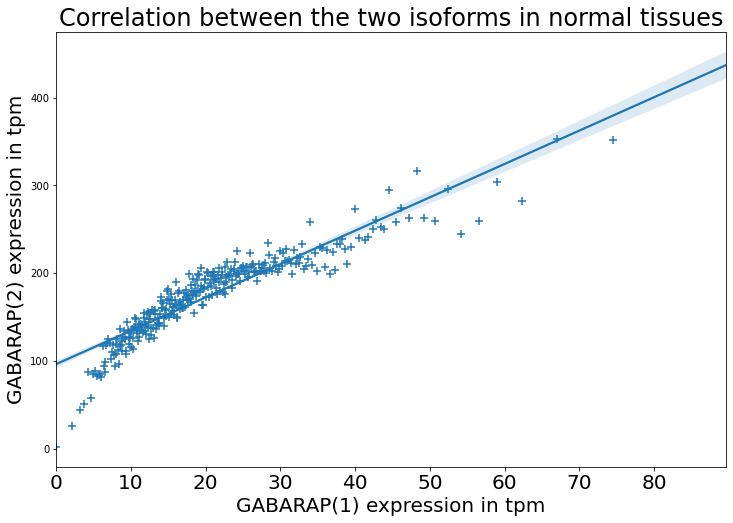

The correlation between iso1 and iso3 in normal tissues is: 0.6349947035237674 0.0


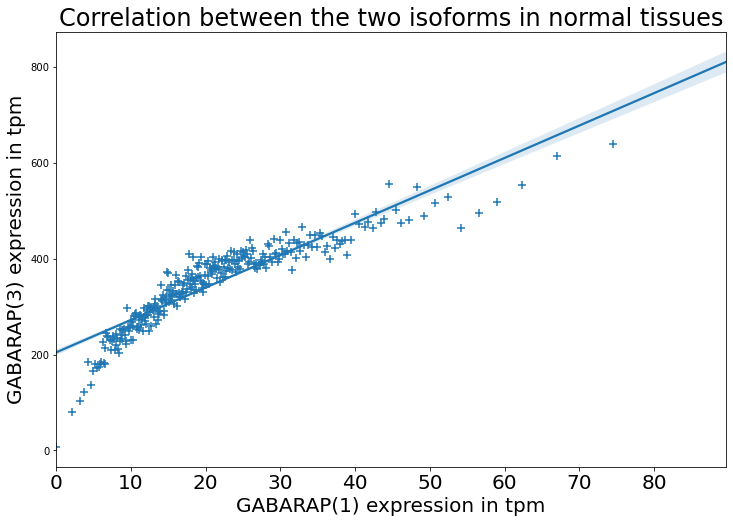


The correlation between iso1 and iso2 in primary tumors is: 0.6277291056654182 0.0


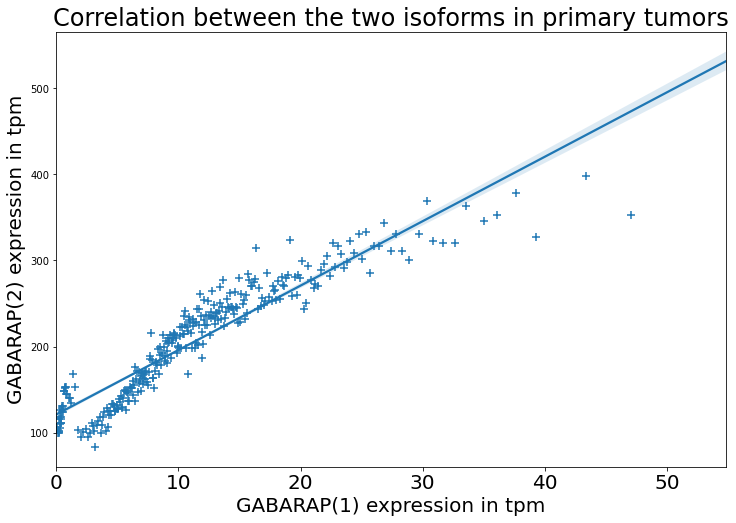

The correlation between iso1 and iso3 in primary tumors is: 0.5383359559219155 0.0


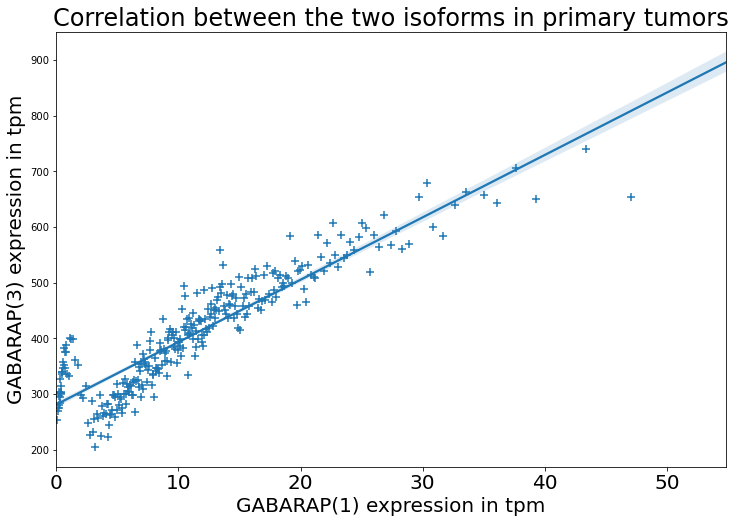

<Figure size 864x576 with 0 Axes>

In [19]:
#isoform correlation in all tissue 

#remove extremities
df_GABARAP_Primary2 = df_GABARAP_Primary[df_GABARAP_Primary['GABARAP_1tpm'] < 55 ]
print('primary')
print("shape:",df_GABARAP_Primary.shape)
print("shape after removing extrem dots:",df_GABARAP_Primary2.shape)
print()
df_GABARAP_Normal2 = df_GABARAP_Normal[df_GABARAP_Normal['GABARAP_1tpm'] < 90 ]
print('normal')
print("shape:",df_GABARAP_Normal.shape)
print("shape after removing extrem dots:",df_GABARAP_Normal2.shape)

tissues = [[df_GABARAP_Normal2, "normal tissues"], [df_GABARAP_Primary2, "primary tumors"]]

for tissue in tissues: 
  x = tissue[0]['GABARAP_1tpm'].to_list()
  y = tissue[0]['GABARAP_2tpm'].to_list()
  z = tissue[0]['GABARAP_3tpm'].to_list()

  r_value, p_value = scipy.stats.pearsonr(x, y)
  print("The correlation between iso1 and iso2 in",tissue[1],"is:", r_value, p_value)

  seaborn.regplot(x=x,y=y, x_bins=300, x_ci = 0, marker="+")
  name = "Correlation between the two isoforms in "+  tissue[1]
  plt.title(name)
  plt.xlabel("GABARAP(1) expression in tpm")
  plt.ylabel('GABARAP(2) expression in tpm')
  plt.show()
  plt.clf()

  r_value, p_value = scipy.stats.pearsonr(x, z)
  print("The correlation between iso1 and iso3 in",tissue[1],"is:", r_value, p_value)
    
  seaborn.regplot(x=x,y=z, x_bins=300, x_ci = 0, marker="+")
  name = "Correlation between the two isoforms in "+  tissue[1]
  plt.title(name)
  plt.xlabel("GABARAP(1) expression in tpm")
  plt.ylabel('GABARAP(3) expression in tpm')
  plt.show()
  plt.clf()
  print()
